# AE 370 Project 1 - A Numerical Method for a Dynamical System
  
**Group Members:**  
- Elijah Lewis 
- Raghav Mansharamani
- Matthew Greenstein
- Jackson Rees

---

## Project Overview
In this project, we investigate an engineering-relevant dynamical system and apply a numerical method to explore its behavior.  

The problem we chose was...

---

## Repository Structure

```text
AE_370_Project_1/
│
├── source/
│   ├── eoms.py               # ODEs and Equations of Motion
│   ├── numerical_methods.py  # Integration algorithms (RK4, AB3)
│   ├── convergence_tests.py  # Error and stability validation
│   └── plotting_utils.py     # Visualization and post-processing
│
├── main.ipynb                # Main notebook (this file)
├── data/                     # Initial condition files
├── results/                  # Generated plots and figures
├── README.md
├── project_requirements.pdf
├── requirements.txt
└── .gitignore
```

---
## Acknowledgements

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Import functions
from source.reactions import *
from source.numerical_methods import *
from source.convergence_tests import *
from source.plotting_utils import *
from source.eoms import *


# Defining the Dynamical System

---


In [2]:
# initial state: x, xdot, theta, thetadot
u0 = [0, -0.5, 0.1, 0]

# run Euler integration
#t, u = euler_forward(skycrane, u0, dt=0.01, t_final=10.0)
#t_damp, u_damp = euler_forward(skycrane_damping, u0, dt=0.01, t_final=10.0)

#run ab3
t_final = 100
dt = 0.05
U, T = ab3_solve(skycrane, u0, dt, t_final)
U_damped, T_damped = ab3_solve(skycrane_damping, u0, dt, t_final)



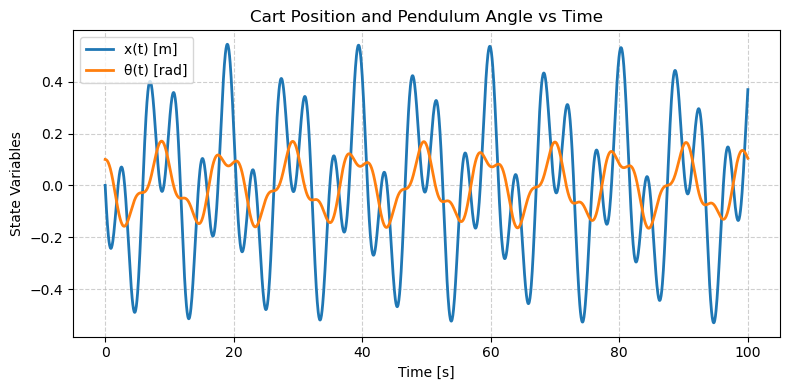

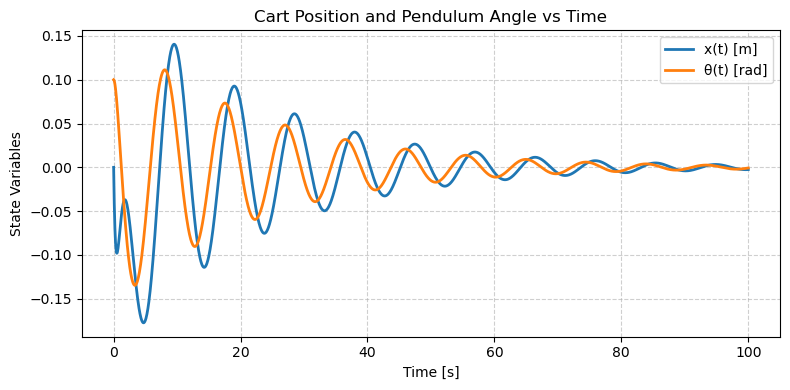

In [3]:
#plot position and angle vs time using ab3 method
plot_x_theta(T, U)
plot_x_theta(T_damped, U_damped)

In [4]:
skip = 3
#animate_skycrane(T, U, dt, skip = skip, save_path="skycrane.gif", title='Undamped')
#animate_skycrane(T_damped, U_damped, dt, skip = skip, save_path="skycrane_damped.gif", title='Damped')


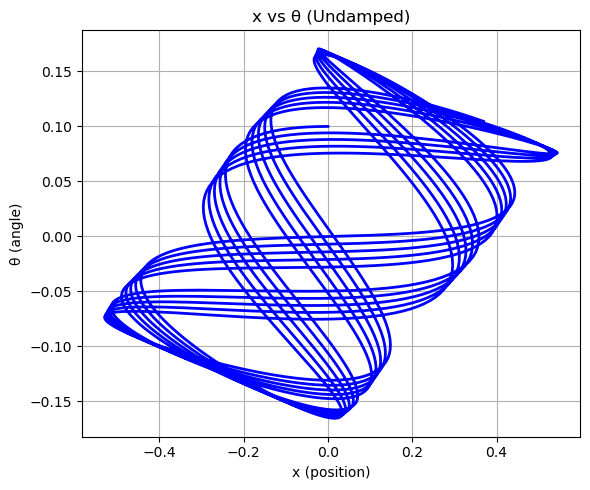

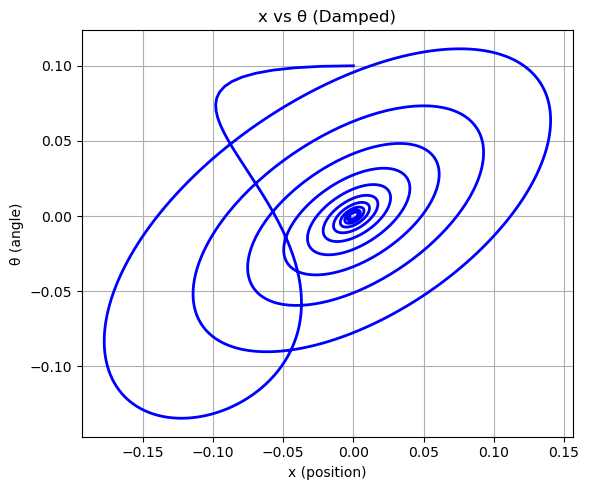

In [5]:
plot_x_vs_theta(U,T,'Undamped')
plot_x_vs_theta(U_damped,T_damped,'Damped')

# Error Convergence Test for AB3 Method

--- 

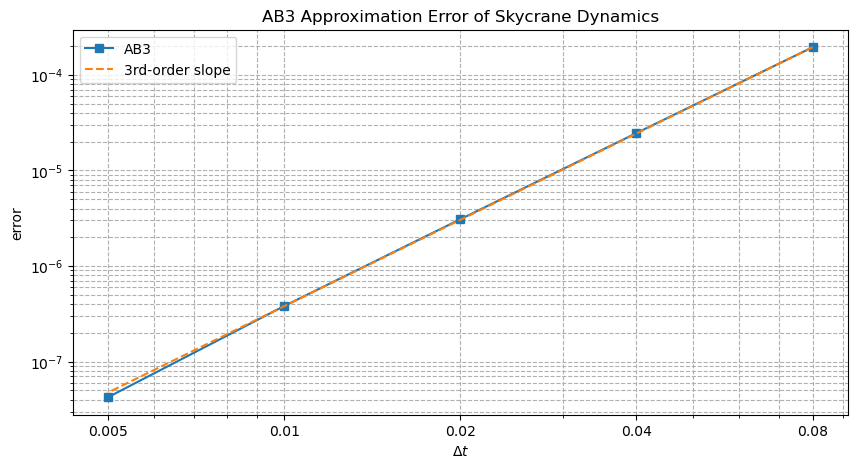

In [6]:
#Error convergence test for AB3 method

delta_t = [8e-2, 4e-2, 2e-2, 1e-2, 5e-3]
delta_t_baseline = 2.5e-3
T_final = 4

error = []
for dt in delta_t:
    e_ab3 = ivp_ab3_error(u0, T_final, dt, delta_t_baseline)
    error.append(e_ab3)

slope = (np.array(delta_t)/delta_t[0])**3 * error[0]


# Plot error along with calculated slope
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.loglog(delta_t, error, label='AB3', marker='s')
ax.loglog(delta_t, slope, '--', label='3rd-order slope')
ax.set_xlabel(r'$\Delta t$')
ax.set_ylabel('error')
ax.set_xticks([8e-2, 4e-2, 2e-2, 1e-2, 5e-3],[8e-2, 4e-2, 2e-2, 1e-2, 5e-3])
ax.legend()
ax.set_title('AB3 Approximation Error of Skycrane Dynamics')
ax.grid(which='both', linestyle='--')
plt.show()

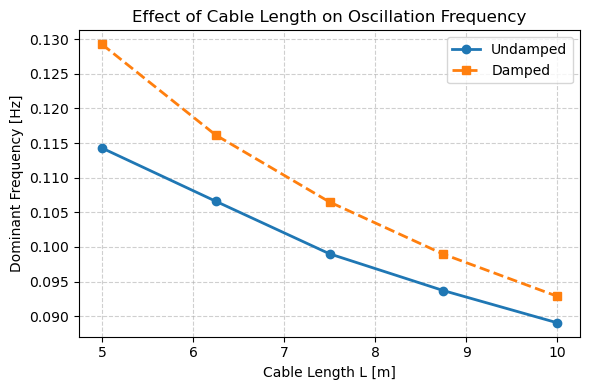

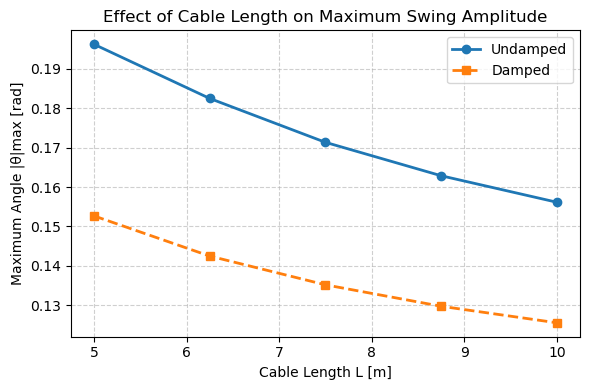

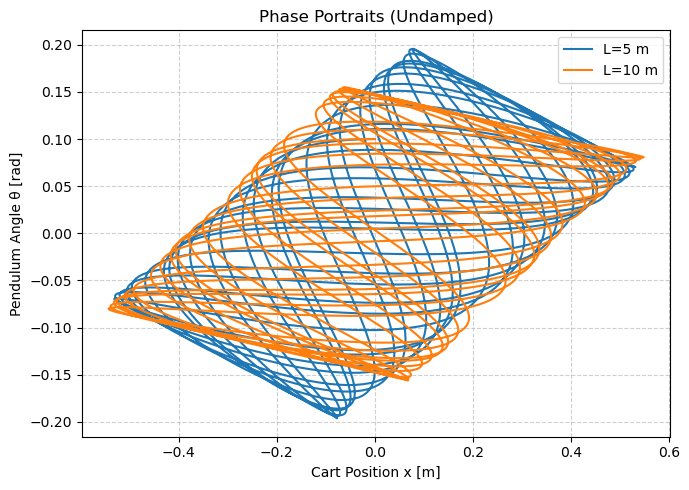

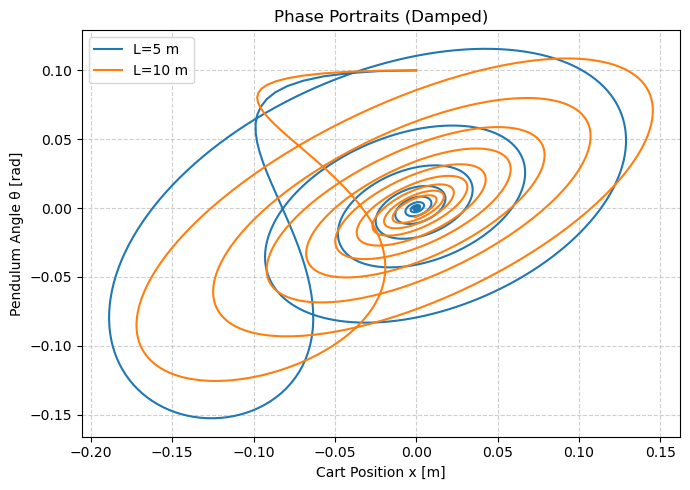

In [7]:
### Q1: Effect of Cable Length on Coupled Dynamics

import numpy as np
from source.numerical_methods import ab3_solve, euler_forward  # whichever you want to use
from source.eoms2 import sweep_length_effect
from source.plotting_utils2 import (
    plot_frequency_vs_length,
    plot_amplitude_vs_length,
    plot_phase_comparison
)

# Initial state (keep your existing choice)
# u0 = [0, -0.5, 0.1, 0]  # example you showed earlier

# Simulation controls (match what you used above)
dt = 0.05
t_final = 100.0

# Length sweep
L_values = np.linspace(5.0, 10.0, 5)

# Pick your integrator: ab3_solve or euler_forward
results = sweep_length_effect(L_values, ab3_solve, u0, dt, t_final)

# Figures
plot_frequency_vs_length(results)
plot_amplitude_vs_length(results)
plot_phase_comparison(results, [L_values[0], L_values[-1]])


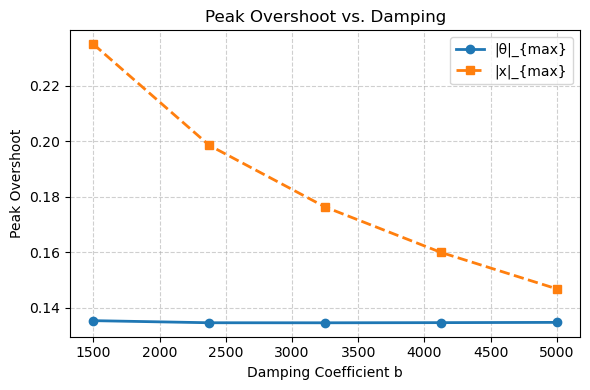

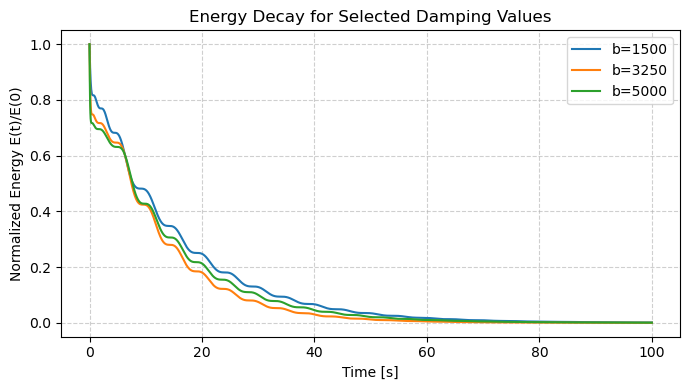

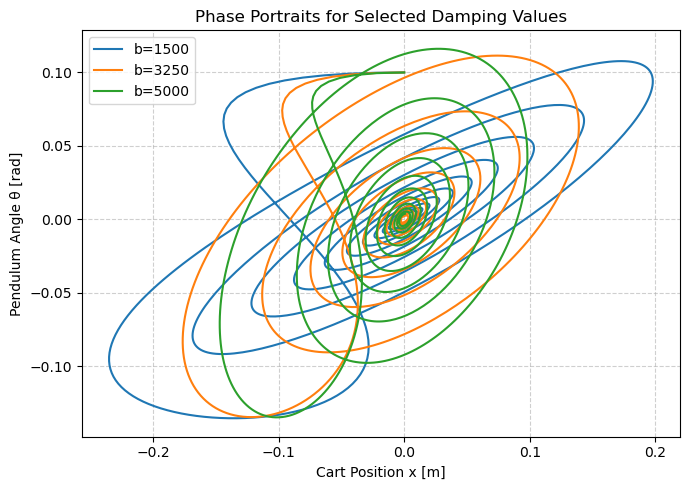

In [8]:
### Q2: Effect of Damping on Stability and Settling Time

import numpy as np
from source.numerical_methods import ab3_solve, euler_forward  # choose one
from source.eoms2 import sweep_damping_effect
from source.plotting_utils2 import (
    plot_overshoot_vs_b,
    plot_energy_decay_examples,
    plot_phase_by_b
)

# Use your existing initial condition u0
# u0 = [0, -0.5, 0.1, 0]  # example

# Simulation controls (match prior cells)
dt = 0.05
t_final = 100.0

# Damping sweep (pick a sensible range for your system)
b_values = np.linspace(1.5e3,5e3,5)

# Tolerances for "settled" (adjust as needed)
eps_x = 0.01     # meters
eps_th = 0.01    # radians
dwell = 2.0      # seconds to remain inside band

results_b = sweep_damping_effect(
    b_values, ab3_solve, u0, dt, t_final,
    constants_base=None, eps_x=eps_x, eps_th=eps_th, dwell=dwell
)

# Figures that directly answer Q2
plot_overshoot_vs_b(results_b)
plot_energy_decay_examples(results_b, [b_values[0], b_values[len(b_values)//2], b_values[-1]])
plot_phase_by_b(results_b, [b_values[0], b_values[len(b_values)//2], b_values[-1]])


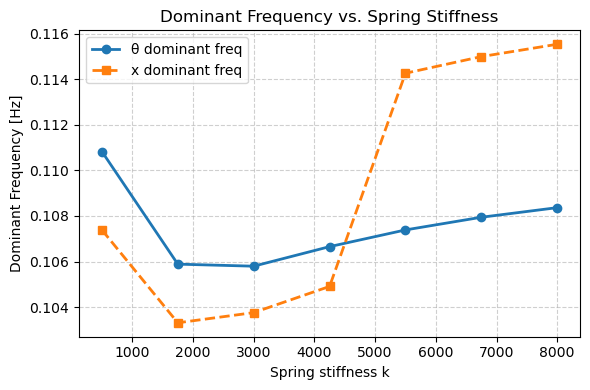

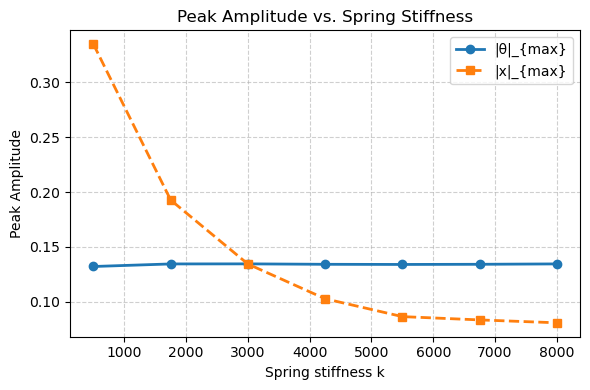

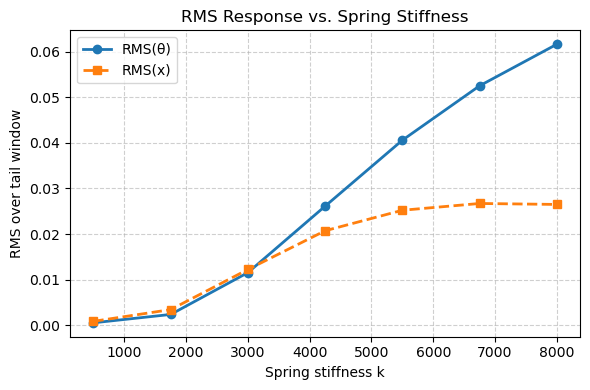

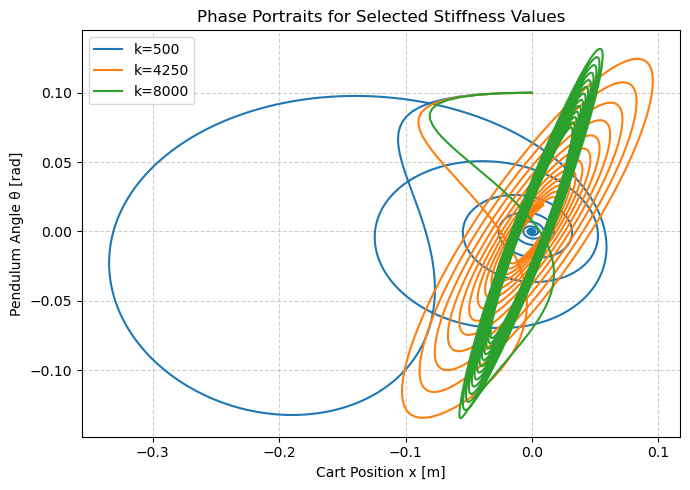

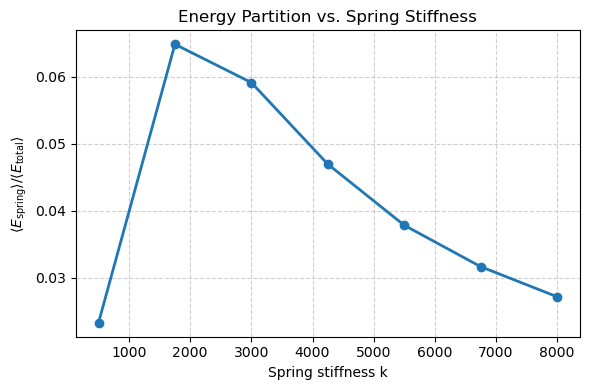

In [9]:
### Q3: Effect of Spring Stiffness on Oscillations & Response

import importlib
import source.eoms2 as eoms2
importlib.reload(eoms2)
from source.eoms2 import sweep_stiffness_effect

import source.plotting_utils2 as pu2
importlib.reload(pu2)
from source.plotting_utils2 import (
    plot_frequency_vs_k,
    plot_amplitude_vs_k,
    plot_rms_vs_k,
    plot_phase_by_k,
    plot_energy_partition_vs_k
)

# Use same integrator & initial conditions as Q2 for consistency
# e.g., ab3_solve, u0 already defined above
dt = 0.05
t_final = 120.0  # adjust if you want more tail window

# Build a stiffness sweep around your baseline k
m1, m2, L, k0, b, g = constants
k_values = np.linspace(0.25*k0, 4.0*k0, 7)  # 7 points from 0.25x to 4x baseline

results_k = sweep_stiffness_effect(
    k_values, ab3_solve, u0, dt, t_final,
    constants_base=constants, frac_window=0.5  # compute RMS/energy over last 50%
)

# Plots that directly answer Q3
plot_frequency_vs_k(results_k)
plot_amplitude_vs_k(results_k)
plot_rms_vs_k(results_k)
# pick 2-3 representative k's for phase portraits
k_list = [float(k_values[0]), float(k_values[len(k_values)//2]), float(k_values[-1])]
plot_phase_by_k(results_k, k_list)
plot_energy_partition_vs_k(results_k)


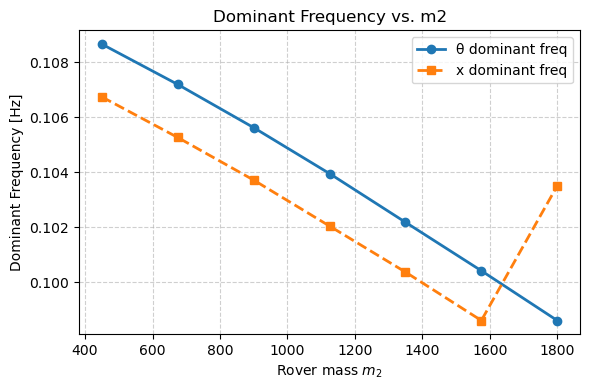

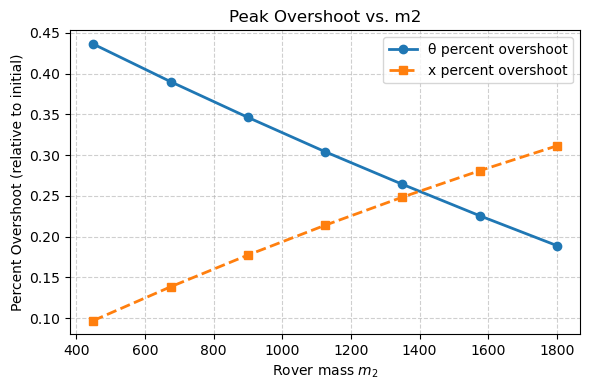

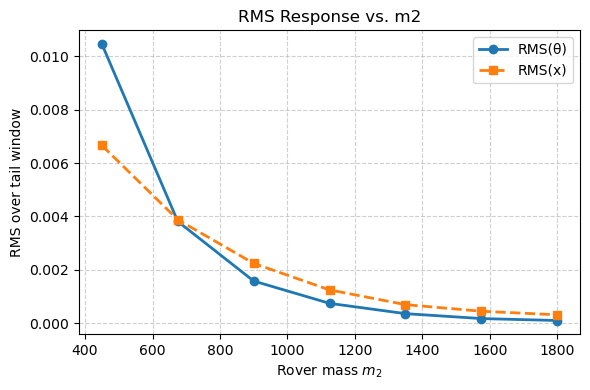

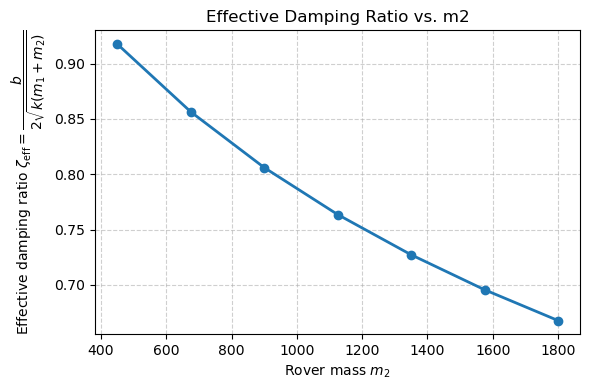

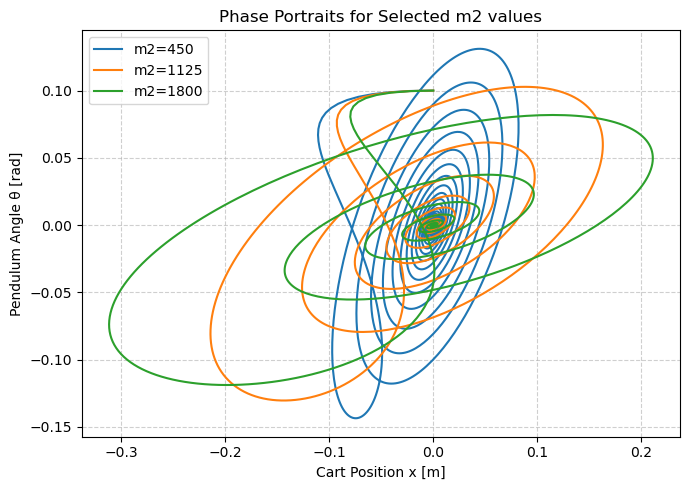

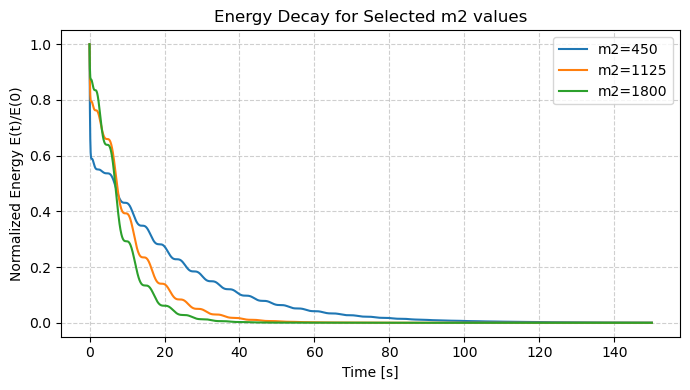

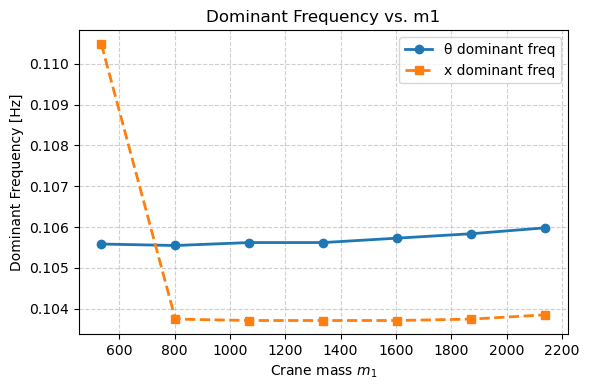

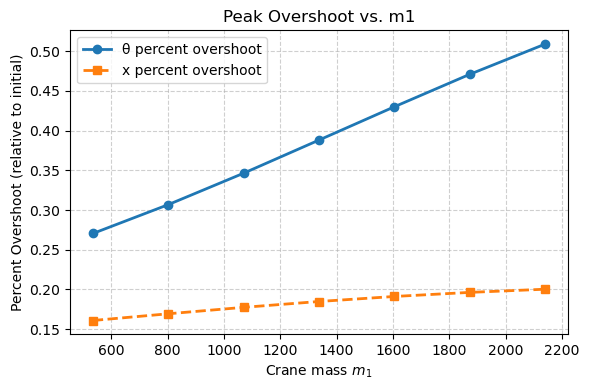

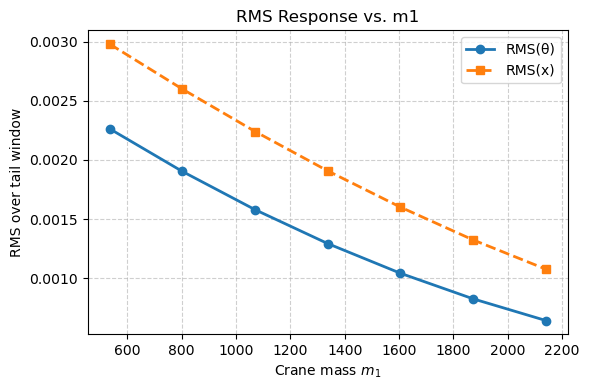

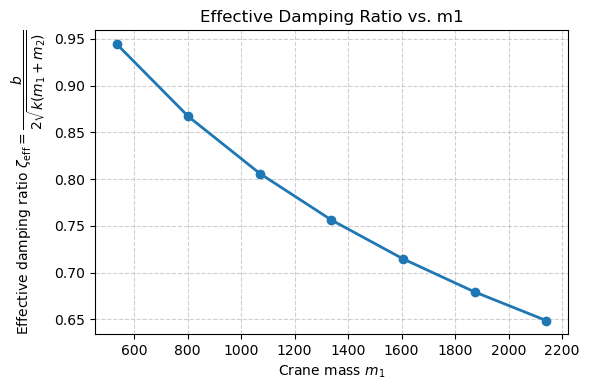

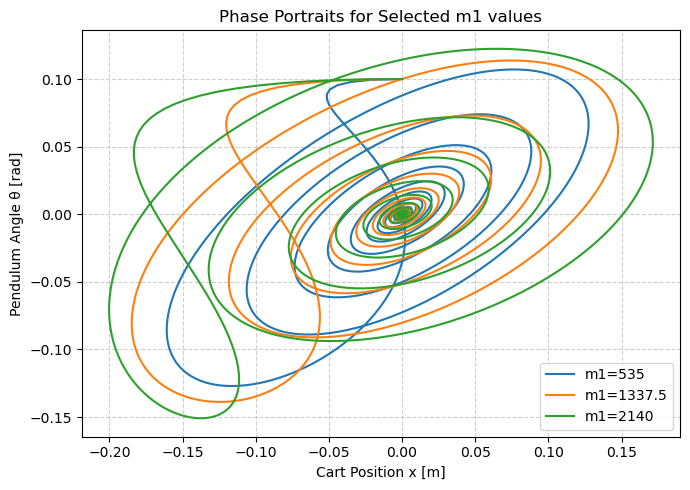

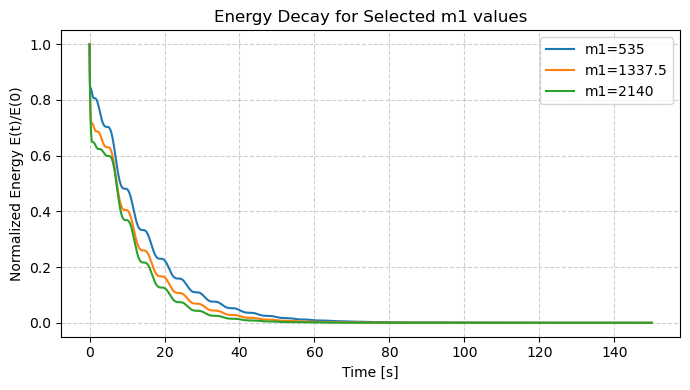

In [10]:
### Q4: Effect of Masses (m1, m2) on Stability & Transients

import importlib
import source.eoms2 as eoms2
importlib.reload(eoms2)
from source.eoms2 import sweep_mass_effects

import source.plotting_utils2 as pu2
importlib.reload(pu2)
from source.plotting_utils2 import (
    plot_frequency_vs_mass,
    plot_overshoot_vs_mass,
    plot_rms_vs_mass,
    plot_phase_by_mass,
    plot_energy_decay_examples_mass,
    plot_zeta_vs_mass
)

# Controls
dt = 0.05
t_final = 150.0   # extend if you want more decay in energy plots
frac_tail = 0.5
t_skip = 1.0

# Baseline constants
m1_0, m2_0, L0, k0, b0, g0 = constants

# --- Sweep rover mass m2 ---
m2_vals = np.linspace(0.5*m2_0, 2.0*m2_0, 7)  # 0.5x .. 2x
results_m2 = sweep_mass_effects(
    'm2', m2_vals, ab3_solve, u0, dt, t_final,
    constants_base=constants, frac_window=frac_tail, t_skip_for_peaks=t_skip
)

plot_frequency_vs_mass(results_m2)
plot_overshoot_vs_mass(results_m2)
plot_rms_vs_mass(results_m2)
plot_zeta_vs_mass(results_m2)
# pick representative values
m2_list = [float(m2_vals[0]), float(m2_vals[len(m2_vals)//2]), float(m2_vals[-1])]
plot_phase_by_mass(results_m2, m2_list)
plot_energy_decay_examples_mass(results_m2, m2_list)

# --- Sweep crane mass m1 ---
m1_vals = np.linspace(0.5*m1_0, 2.0*m1_0, 7)  # 0.5x .. 2x
results_m1 = sweep_mass_effects(
    'm1', m1_vals, ab3_solve, u0, dt, t_final,
    constants_base=constants, frac_window=frac_tail, t_skip_for_peaks=t_skip
)

plot_frequency_vs_mass(results_m1)
plot_overshoot_vs_mass(results_m1)
plot_rms_vs_mass(results_m1)
plot_zeta_vs_mass(results_m1)
m1_list = [float(m1_vals[0]), float(m1_vals[len(m1_vals)//2]), float(m1_vals[-1])]
plot_phase_by_mass(results_m1, m1_list)
plot_energy_decay_examples_mass(results_m1, m1_list)
